In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
## NSL-KDD dataset: training and testing data
train_data = pd.read_csv('KDDTrain+.txt', header=None)
test_data = pd.read_csv('KDDTest+.txt', header=None)

In [ ]:
# Adding column names
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
           'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
           'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'attack', 'level']

train_data.columns = columns
test_data.columns = columns

In [ ]:
# combining training and testing datasets to get the full data of NSL-KDD
full_data = pd.concat([train_data, test_data], ignore_index=True)
nsl_kdd_data = full_data

In [ ]:
# showing first 5 rows from the data
nsl_kdd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# Retriving three features from the dataset and displaying first 5 rows
features = nsl_kdd_data[["protocol_type", "service", "flag"]]
features.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [ ]:
num_cols = features._get_numeric_data().columns

cate_cols = list(set(features.columns)-set(num_cols))
cate_cols

['flag', 'protocol_type', 'service']

In [ ]:
# Visualizing the data for different features in a graph
def bar_graph(feature):
    features[feature].value_counts().plot(kind="bar")

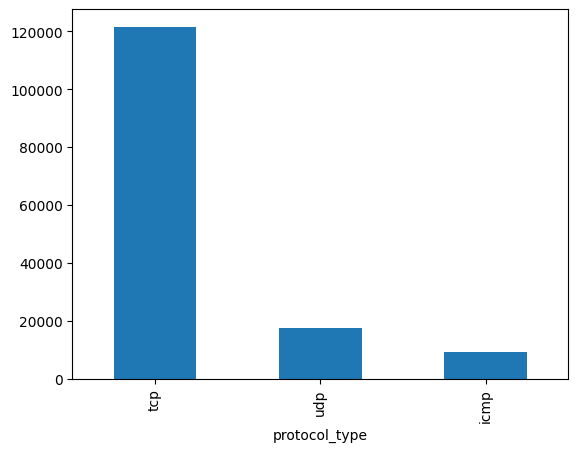

In [ ]:
bar_graph('protocol_type')

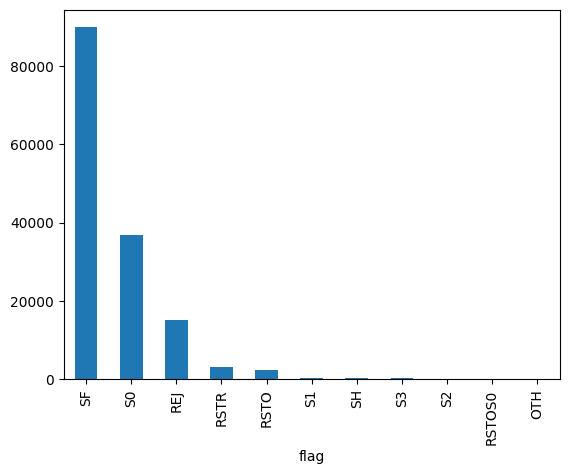

In [ ]:
bar_graph('flag')

In [ ]:
# Get the count of each class in the 'attack' column
class_counts = nsl_kdd_data['attack'].value_counts()

# Print the counts for each class
print("Class counts:\n", class_counts)

# Compute the total sum of all counts
total_count = class_counts.sum()
print("\nTotal count of all classes:", total_count)

Class counts:
 attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udp

In [ ]:
# Calculating the rank and importance of the attacks

nsl_kdd_data['attack'].value_counts()/len(nsl_kdd_data)

,count
attack,
normal,0.518823
neptune,0.308860
satan,0.029411
ipsweep,0.025182
smurf,0.022294
portsweep,0.020792
nmap,0.010544
back,0.008854
guess_passwd,0.008645
